## 信號與系統

信號是用來表達和傳遞信息的物理量，可以是連續的也可以是離散的。連續信號是定義在連續時間域上的函數，離散信號是定義在離散時間序列上的數字序列。
理解信號的性質非常重要，如能量、功率、頻譜等。連續信號的頻譜可以通過傅立葉變換獲得，離散信號則需要用離散傅立葉變換（DFT）。
系統是一個將輸入信號轉換為輸出信號的裝置或過程。線性時不變系統（LTI系統）是一類特殊的系統，其輸出與輸入之間滿足線性關係，且與時間平移無關。LTI系統的特性包括：
- 穩定性：系統的輸出在有界輸入下保持有界
- 因果性：系統的輸出只依賴於當前及過去的輸入
- 頻率響應：系統在頻率域的傳輸特性


# 線性時不變系統 (LTI) 介紹

線性時不變系統 (Linear Time-Invariant System, LTI) 是信號處理和控制系統中的一個重要概念。這類系統具有兩個關鍵特徵：**線性性**和**時間不變性**，這些特性使得 LTI 系統在分析和設計時具有極大的優勢。

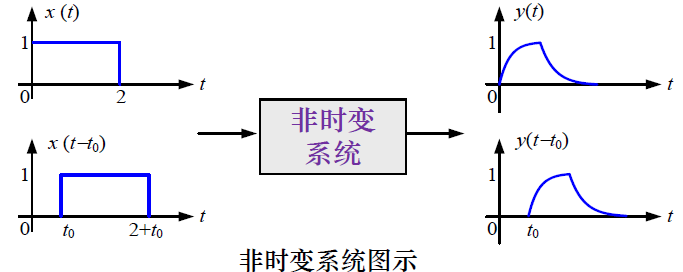

## 1. 線性性 (Linearity)
LTI 系統的線性性意味著系統對輸入信號的響應遵循**疊加原理**。具體來說，如果輸入信號 $x_1(t)$ 產生輸出 $y_1(t)$，而輸入 $x_2(t)$ 產生輸出 $y_2(t)$，則對於任意的常數 $a$ 和 $b$，輸入信號 $a \cdot x_1(t) + b \cdot x_2(t)$ 將產生輸出 $a \cdot y_1(t) + b \cdot y_2(t)$。

這表示：

$$
f(a \cdot x_1(t) + b \cdot x_2(t)) = a \cdot f(x_1(t)) + b \cdot f(x_2(t))
$$

此性質是線性系統分析的基礎，使得可以通過分解複雜信號來簡化系統分析。

#### **線性系統**<br>
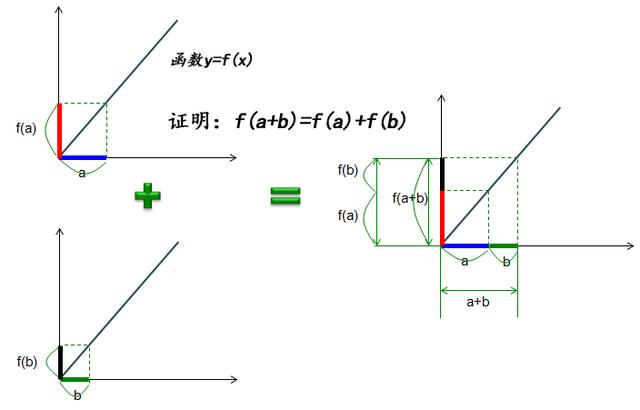

#### **非線性系統**<br>
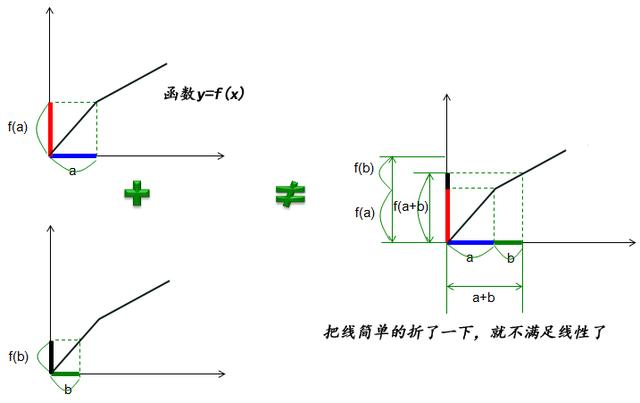

## 2. 時間不變性 (Time Invariance)
時間不變性意味著系統對輸入信號的響應不隨時間的改變而改變。換句話說，若輸入信號 $x(t)$ 產生輸出 $y(t)$，則將輸入信號延遲一段時間 $x(t-\tau)$ 會產生相同的時間延遲輸出 $y(t-\tau)$。這特性使得 LTI 系統的行為在時間上是一致的。

$$
\text{如果} \quad y(t) = \mathcal{H}\{x(t)\} \\
\text{則} \quad y(t-\tau) = \mathcal{H}\{x(t-\tau)\}
$$

這表示系統 $\mathcal{H}$ 的輸出不會因為輸入信號的時間平移而改變，即系統的行為不隨時間改變。

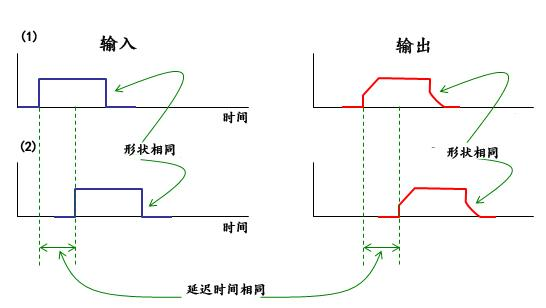

## 3. 衝激響應 (Impulse Response)
衝激響應是表徵 LTI 系統的一種關鍵方式。衝激響應 $h(t)$ 是系統對單位衝激信號 $\delta(t)$ 的響應。利用衝激響應，可以計算系統對任意輸入信號的輸出，這是通過**卷積**來實現的。

## 4. 卷積 (Convolution)
卷積是 LTI 系統中用來計算系統輸出的一種數學運算。給定輸入信號 $x(t)$ 和系統的衝激響應 $h(t)$，輸出 $y(t)$ 可以表示為：

$$
y(t) = x(t) * h(t) = \int_{-\infty}^{\infty} x(\tau) h(t-\tau) d\tau
$$

![示意圖](https://static.coderbridge.com/img/tzupingkao/51db96bfc6e54d99a2f6e69f34df0483.gif)
![示意圖](https://static.coderbridge.com/img/tzupingkao/9f197ec39a2d48bb8806a8df536911cd.gif)
![示意圖](https://e2eml.school/images/conv1d/multichannel.gif)

捲積其實就是滑窗運算 (股票市場中的移動平均也是類似的概念)

![示意圖](https://i.stack.imgur.com/kTBiy.gif)

卷積運算能夠有效地將輸入信號與系統的特性結合，得到系統的響應。

## LTI 系統在通信技術中的應用
在通信系統中，LTI 系統的這些特性被廣泛應用於信號處理、濾波器設計、數據傳輸等領域。LTI 系統的分析方法使得設計者能夠預測系統在各種輸入條件下的行為，從而優化系統性能。

總之，LTI 系統的線性性和時間不變性使得它們在信號處理和控制領域具有廣泛應用，利用衝激響應和卷積運算，可以有效地分析和設計這些系統。

----


## 範例: ECG-ID Database

https://physionet.org/content/ecgiddb/1.0.0/Person_01/#files-panel

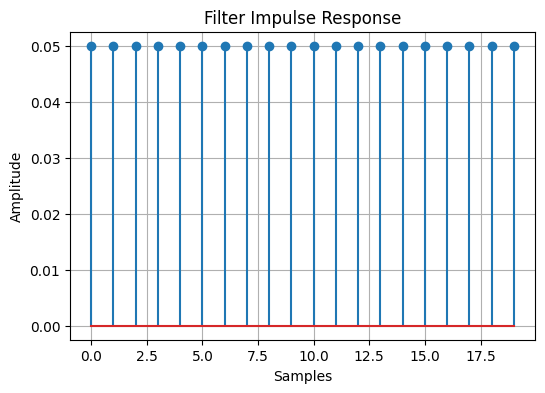

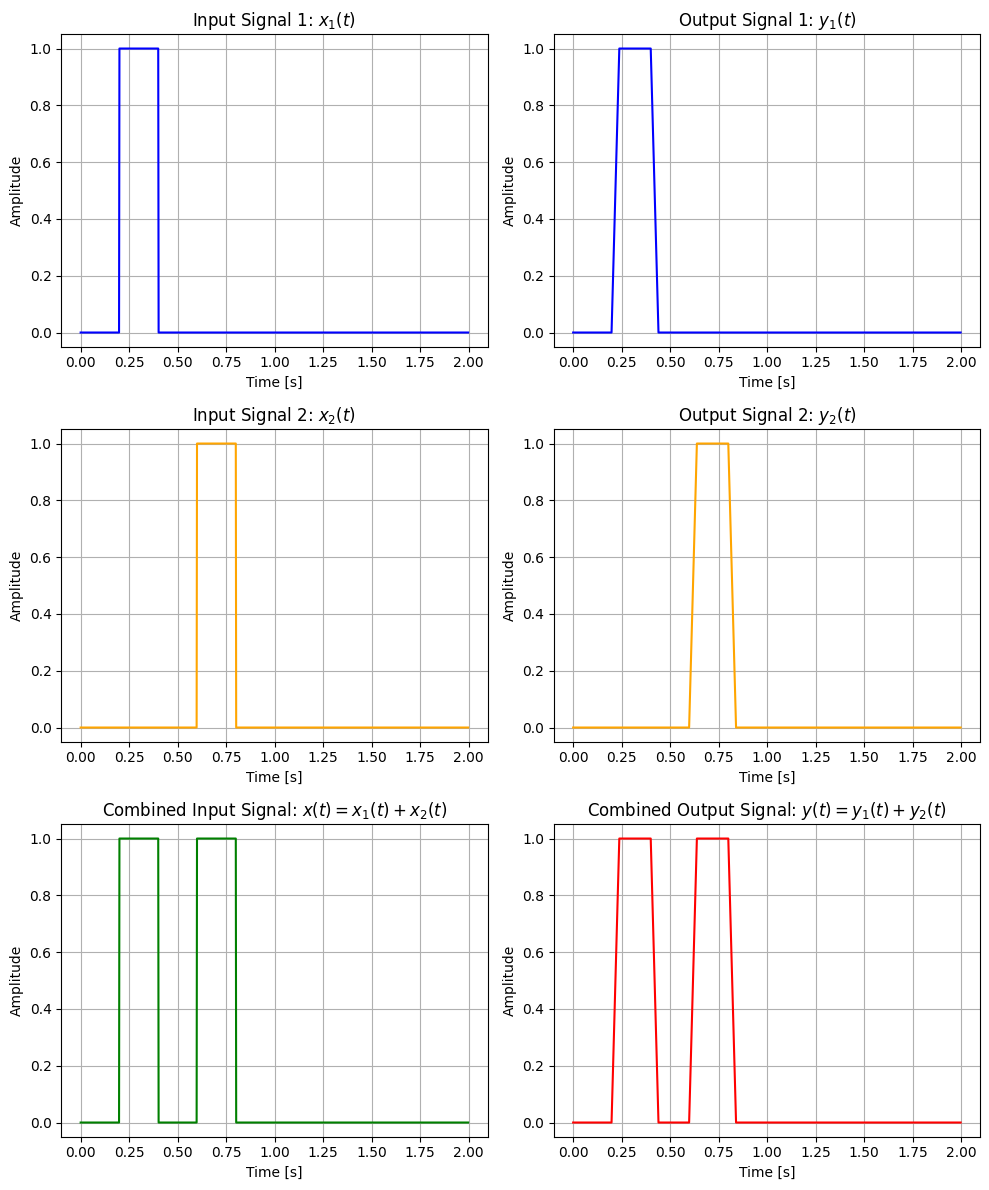

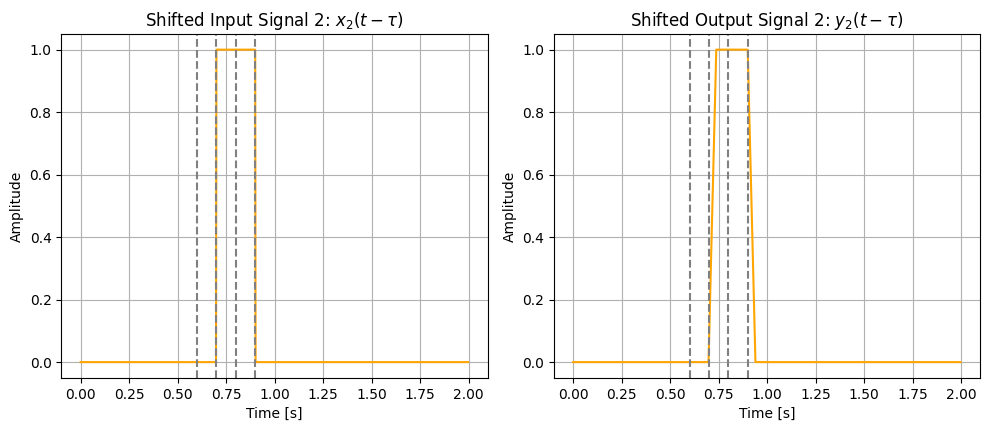

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter

# 設定訊號的參數
fs = 500  # 取樣頻率
t = np.arange(0, 2.0, 1.0 / fs)  # 時間軸

def create_square_wave(start_time, end_time, t):
    """
    生成非週期性的方波信號。
    
    :param start_time: 方波開始時間
    :param end_time: 方波結束時間
    :param t: 時間軸數據
    :return: 方波信號
    """
    return np.where((t >= start_time) & (t <= end_time), 1, 0)

def apply_filter(input_signal, b, a=1):
    """
    對信號進行濾波處理。
    
    :param input_signal: 輸入信號
    :param b: 濾波器分子係數
    :param a: 濾波器分母係數
    :return: 濾波後的信號
    """
    return lfilter(b, a, input_signal)

def plot_signals(t, signals, titles, colors, layout=(1, 1), xlabel='Time [s]', ylabel='Amplitude', reference_points=None):
    """
    繪製信號的子圖。
    
    :param t: 時間軸數據
    :param signals: 要繪製的信號列表
    :param titles: 每個子圖的標題
    :param colors: 每個信號的顏色
    :param layout: 子圖布局，默認為(1, 1)
    :param xlabel: X軸標籤
    :param ylabel: Y軸標籤
    :param reference_points: 虛線參考點
    """
    rows, cols = layout
    plt.figure(figsize=(10, rows * 4))
    for i, (signal, title, color) in enumerate(zip(signals, titles, colors), 1):
        plt.subplot(rows, cols, i)
        plt.plot(t, signal, color=color)
        if reference_points is not None:
            for rp in reference_points:
                plt.axvline(x=rp, color='gray', linestyle='--')
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_impulse_response(b):
    """
    繪製濾波器的脈衝響應。
    
    :param b: 濾波器分子係數
    """
    plt.figure(figsize=(6, 4))
    plt.stem(b)
    plt.title('Filter Impulse Response')
    plt.xlabel('Samples')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.show()

# 主函數
def main():
    # 生成信號
    input_signal1 = create_square_wave(0.2, 0.4, t)
    input_signal2 = create_square_wave(0.6, 0.8, t)

    # 設定濾波器
    n = 20  # 濾波器階數
    b = np.ones(n) / n  # 濾波器係數

    # 繪製濾波器脈衝響應
    plot_impulse_response(b)

    # 濾波處理
    output_signal1 = apply_filter(input_signal1, b)
    output_signal2 = apply_filter(input_signal2, b)

    # 兩個方波相加
    combined_input_signal = input_signal1 + input_signal2

    # 濾波處理後的相加訊號
    combined_output_signal = apply_filter(combined_input_signal, b)

    # 線性性示例
    plot_signals(
        t, 
        [input_signal1, output_signal1, input_signal2, output_signal2, combined_input_signal, combined_output_signal],
        [
            r'Input Signal 1: $x_1(t)$',
            r'Output Signal 1: $y_1(t)$',
            r'Input Signal 2: $x_2(t)$',
            r'Output Signal 2: $y_2(t)$',
            r'Combined Input Signal: $x(t) = x_1(t) + x_2(t)$',
            r'Combined Output Signal: $y(t) = y_1(t) + y_2(t)$'
        ],
        ['blue', 'blue', 'orange', 'orange', 'green', 'red'],
        layout=(3, 2)
    )

    # 示範時間不變性：移動信號2
    shift = 0.1  # 時間移動
    shifted_input_signal2 = create_square_wave(0.6 + shift, 0.8 + shift, t)
    shifted_output_signal2 = apply_filter(shifted_input_signal2, b)

    # 時間不變性示例
    plot_signals(
        t, 
        [ shifted_input_signal2, shifted_output_signal2],
        [
            r'Shifted Input Signal 2: $x_2(t - \tau)$',
            r'Shifted Output Signal 2: $y_2(t - \tau)$'
        ],
        ['orange', 'orange', 'purple', 'purple'],
        layout=(2, 2),
        reference_points=[0.6, 0.8, 0.6 + shift, 0.8 + shift]
    )

if __name__ == "__main__":
    main()


# 波形的疊加效應介紹

在信號處理中，波形的疊加效應是理解複雜信號的重要概念。當多個正弦波或其他形式的波形相互疊加時，結果會產生一個新的複合波形。這個複合波形的形狀取決於各個波形的**振幅**、**頻率**、**相位**等參數。

我們可以用數學公式來描述這些現象，並通過視覺化來觀察波形疊加的效果。

## 基本的三角函數表示

假設有兩個正弦波，其數學表達式如下：

$$ y_1(t) = A_1 \sin(2\pi f_1 t + \phi_1) $$

$$ y_2(t) = A_2 \sin(2\pi f_2 t + \phi_2) $$

其中：
- $A_1$ 和 $A_2$ 分別是第一個和第二個正弦波的**振幅**（Amplitude），即波形的最大值。
- $f_1$ 和 $f_2$ 是**頻率**（Frequency），定義了波形在每秒鐘內振盪的次數。
- $\phi_1$ 和 $\phi_2$ 是**相位**（Phase），定義了波形的橫向偏移量。
- $t$ 是時間變量。

## 波形疊加

當這兩個波形相加時，得到的複合波形為：

$$ y(t) = y_1(t) + y_2(t) = A_1 \sin(2\pi f_1 t + \phi_1) + A_2 \sin(2\pi f_2 t + \phi_2) $$

這個疊加波形的形狀取決於兩個波形的**疊加效應**，如**振幅加成**、**相位疊加**等。

## 平移、拉伸與波形特性

- **平移（Translation）**: 若將波形沿時間軸平移，例如將 $t$ 替換為 $t - t_0$，則波形的相位會改變，導致波形向左或向右移動。

  $$ y(t) = A \sin(2\pi f (t - t_0) + \phi) $$
  
- **拉伸（Stretching）**: 若改變頻率 $f$，波形的**週期** $T$（即完成一次完整振盪所需的時間）會發生變化。週期 $T$ 與頻率 $f$ 的關係為：

  $$ T = \frac{1}{f} $$

- **相位（Phase）**: 相位 $\phi$ 的改變會導致波形的橫向位移，影響波形的起始點。
  
- **振幅（Amplitude）**: 改變振幅 $A$ 會直接影響波形的高度，即波峰和波谷的值。

- **波長（Wavelength）**: 波長 $\lambda$ 是波形在空間上的延展長度。對於給定的頻率 $f$ 和波速 $v$，波長 $\lambda$ 與頻率的關係為：

  $$ \lambda = \frac{v}{f} $$

- **頻率與週期（Frequency and Period）**: 頻率 $f$ 是指每秒鐘的振盪次數，週期 $T$ 是波形完成一個完整循環所需的時間，兩者的關係為：

  $$ f = \frac{1}{T} $$



### 補充 相位（Phase）

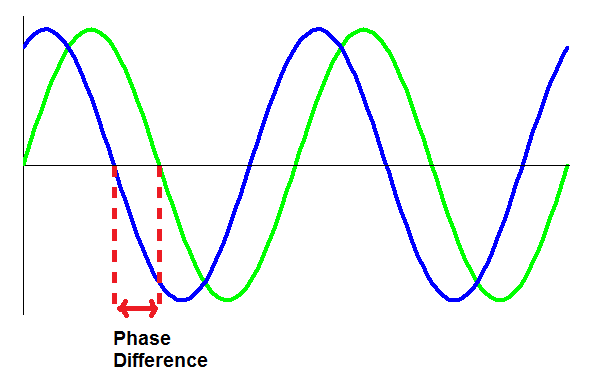
![示意圖](https://www.nist.gov/sites/default/files/images/2022/01/27/phase.gif)

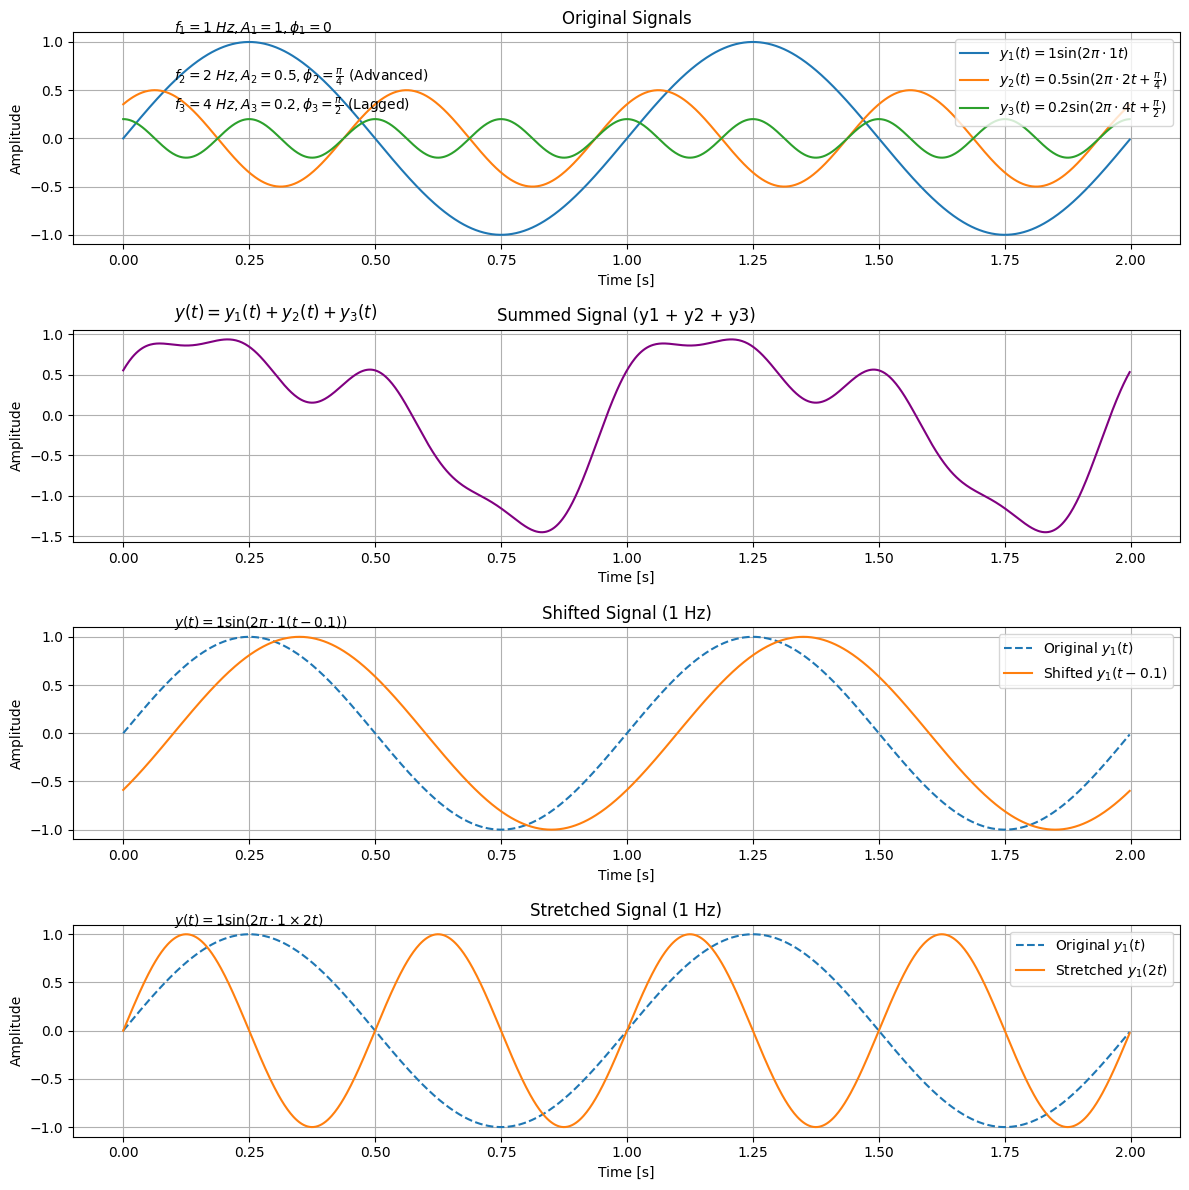

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 設定訊號的參數
fs = 500  # 取樣頻率
t = np.arange(0, 2.0, 1.0 / fs)  # 時間軸

# 生成三個不同頻率的正弦波
def create_sine_wave(freq, amplitude, phase, t):
    return amplitude * np.sin(2 * np.pi * freq * t + phase)

# 設定頻率，確保周期為整數
f1 = 1  # 1 Hz
f2 = 2  # 2 Hz
f3 = 4  # 4 Hz

# 生成原始波形
y1 = create_sine_wave(f1, 1, 0, t)  # 1 Hz
y2 = create_sine_wave(f2, 0.5, np.pi/4, t)  # 2 Hz, 相位移 π/4
y3 = create_sine_wave(f3, 0.2, np.pi/2, t)  # 4 Hz, 相位移 π/2

# 疊加波形
y_sum = y1 + y2 + y3

# 平移波形
y1_shifted = create_sine_wave(f1, 1, 0, t - 0.1)

# 拉伸波形
y2_stretched = create_sine_wave(f1, 1, 0, t * 2.0)

# 視覺化
plt.figure(figsize=(12, 12))

# 原始波形
plt.subplot(4, 1, 1)
plt.plot(t, y1, label=r'$y_1(t) = 1\sin(2\pi \cdot 1t)$')
plt.plot(t, y2, label=r'$y_2(t) = 0.5\sin(2\pi \cdot 2t + \frac{\pi}{4})$')
plt.plot(t, y3, label=r'$y_3(t) = 0.2\sin(2\pi \cdot 4t + \frac{\pi}{2})$')
plt.legend()
plt.title('Original Signals')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.text(0.1, 1.1, r'$f_1 = 1\ Hz, A_1 = 1, \phi_1 = 0$', fontsize=10)
plt.text(0.1, 0.6, r'$f_2 = 2\ Hz, A_2 = 0.5, \phi_2 = \frac{\pi}{4}\ (\text{Advanced})$', fontsize=10)
plt.text(0.1, 0.3, r'$f_3 = 4\ Hz, A_3 = 0.2, \phi_3 = \frac{\pi}{2}\ (\text{Lagged})$', fontsize=10)
plt.grid(True)

# 疊加波形
plt.subplot(4, 1, 2)
plt.plot(t, y_sum, color='purple')
plt.title('Summed Signal (y1 + y2 + y3)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.text(0.1, 1.2, r'$y(t) = y_1(t) + y_2(t) + y_3(t)$', fontsize=12)
plt.grid(True)

# 平移波形
plt.subplot(4, 1, 3)
plt.plot(t, y1, label=r'Original $y_1(t)$', linestyle='--')
plt.plot(t, y1_shifted, label=r'Shifted $y_1(t - 0.1)$')
plt.legend()
plt.title('Shifted Signal (1 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.text(0.1, 1.1, r'$y(t) = 1\sin(2\pi \cdot 1(t - 0.1))$', fontsize=10)
plt.grid(True)

# 拉伸波形
plt.subplot(4, 1, 4)
plt.plot(t, y1, label=r'Original $y_1(t)$', linestyle='--')
plt.plot(t, y2_stretched, label=r'Stretched $y_1(2t)$')
plt.legend()
plt.title('Stretched Signal (1 Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.text(0.1, 1.1, r'$y(t) = 1\sin(2\pi \cdot 1 \times 2t)$', fontsize=10)
plt.grid(True)

plt.tight_layout()
plt.show()



###  訊號處理系統中 低通、帶通和高通濾波器 (pass filter) 的差異和特性

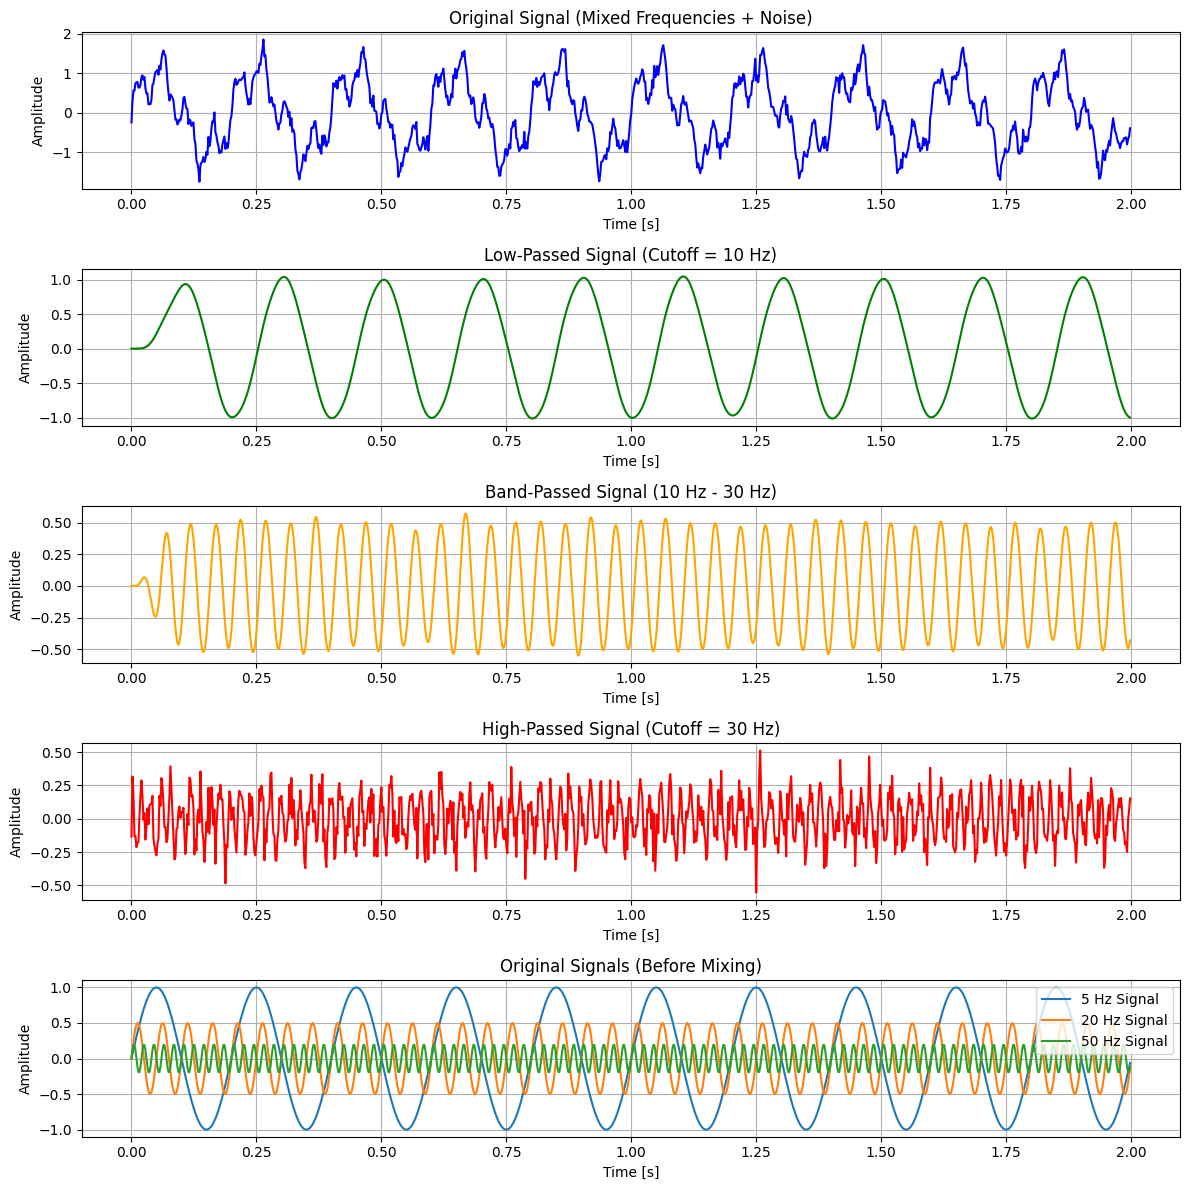

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

# 設定訊號的參數
fs = 500  # 取樣頻率
t = np.arange(0, 2.0, 1.0 / fs)  # 時間軸

# 生成三個不同頻率的正弦波
def create_sine_wave(freq, amplitude, t):
    return amplitude * np.sin(2 * np.pi * freq * t)

# 生成噪聲
def create_noise(amplitude, t):
    return amplitude * np.random.normal(size=len(t))

# 設計濾波器 (Butterworth)
def butter_filter(data, cutoff, fs, btype, order=5, lowcut=None, highcut=None):
    nyq = 0.5 * fs  # Nyquist 頻率
    if btype == 'band':
        normal_cutoff = [lowcut / nyq, highcut / nyq]
    else:
        normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype=btype, analog=False)
    y = lfilter(b, a, data)
    return y

# 主函數
def main():
    # 生成信號
    signal1 = create_sine_wave(5, 1, t)    # 5 Hz 信號
    signal2 = create_sine_wave(20, 0.5, t)  # 20 Hz 信號
    signal3 = create_sine_wave(50, 0.2, t)  # 50 Hz 信號
    noise = create_noise(0.1, t)  # 添加噪聲

    # 混合信號
    combined_signal = signal1 + signal2 + signal3 + noise

    # 設計低通濾波器 (cutoff = 10 Hz)
    low_passed_signal = butter_filter(combined_signal, cutoff=10, fs=fs, btype='low')

    # 設計帶通濾波器 (10 Hz - 30 Hz)
    band_passed_signal = butter_filter(combined_signal, cutoff=None, fs=fs, btype='band', lowcut=10, highcut=30)

    # 設計高通濾波器 (cutoff = 30 Hz)
    high_passed_signal = butter_filter(combined_signal, cutoff=30, fs=fs, btype='high')

    # 視覺化
    plt.figure(figsize=(12, 12))

    # 原始混合信號
    plt.subplot(5, 1, 1)
    plt.plot(t, combined_signal, color='blue')
    plt.title('Original Signal (Mixed Frequencies + Noise)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # 低通濾波器後的信號
    plt.subplot(5, 1, 2)
    plt.plot(t, low_passed_signal, color='green')
    plt.title('Low-Passed Signal (Cutoff = 10 Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # 帶通濾波器後的信號
    plt.subplot(5, 1, 3)
    plt.plot(t, band_passed_signal, color='orange')
    plt.title('Band-Passed Signal (10 Hz - 30 Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # 高通濾波器後的信號
    plt.subplot(5, 1, 4)
    plt.plot(t, high_passed_signal, color='red')
    plt.title('High-Passed Signal (Cutoff = 30 Hz)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)

    # 濾波器響應
    plt.subplot(5, 1, 5)
    plt.plot(t, signal1, label='5 Hz Signal')
    plt.plot(t, signal2, label='20 Hz Signal')
    plt.plot(t, signal3, label='50 Hz Signal')
    plt.legend(loc='upper right')
    plt.title('Original Signals (Before Mixing)')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()



# 結論：低通、帶通和高通濾波器的差異和特性

在信號處理領域中，**濾波器**是用來調整或控制信號中不同頻率成分的工具。根據通過或阻擋的頻率範圍，濾波器可以分為**低通（Low-Pass）**、**帶通（Band-Pass）**和**高通（High-Pass）**三種類型。了解這些濾波器的特性和應用對於處理各種信號（如音頻、圖像、通信信號等）非常重要。

以下是對這三種類型濾波器的詳細解釋：

---

## 1. 低通濾波器（Low-Pass Filter）

### **特性**
- **通過低頻信號**：允許低於特定截止頻率的信號成分通過。
- **阻擋高頻信號**：衰減或完全阻擋高於截止頻率的信號成分。
- **平滑信號**：能夠去除信號中的高頻噪聲，使信號更為平滑。

### **應用**
- **去噪**：在音頻處理中，低通濾波器常用於去除高頻噪聲，例如從錄音中去除嘶嘶聲。
- **防止混疊（Aliasing）**：在數位信號處理中，於取樣前使用低通濾波器可以防止高頻成分導致的混疊效應。
- **圖像處理**：用於模糊圖像，去除細節和紋理，實現平滑效果。

### **示例解釋**
在我們的實驗中，低通濾波器將**5 Hz**的低頻信號完整保留，部分保留**20 Hz**的中頻信號，但**50 Hz**的高頻信號和高頻噪聲則被大幅度衰減。因此，濾波後的信號看起來更加平滑，主要由低頻成分構成。

---

## 2. 帶通濾波器（Band-Pass Filter）

### **特性**
- **通過特定頻率範圍內的信號**：允許位於設定的低截止頻率和高截止頻率之間的信號成分通過。
- **阻擋其他頻率**：衰減或阻擋低於低截止頻率和高於高截止頻率的信號成分。
- **提取特定頻段**：能夠從混合信號中提取出感興趣的頻率範圍。

### **應用**
- **通信系統**：在無線通信中，用於選擇特定頻段的信號，過濾掉干擾和噪聲。
- **語音處理**：提取人聲頻率範圍（通常在300 Hz到3400 Hz之間）以提高語音清晰度。
- **醫學信號處理**：例如在心電圖（ECG）中，帶通濾波器可用於提取心臟活動的相關頻率，過濾掉其他生理或環境噪聲。

### **示例解釋**
在我們的實驗中，帶通濾波器設定在**10 Hz到30 Hz**之間。濾波後的信號主要保留了**20 Hz**的中頻信號，**5 Hz**的低頻信號和**50 Hz**的高頻信號則被衰減。這使得我們能夠專注於中頻成分，過濾掉不需要的低頻和高頻干擾。

---

## 3. 高通濾波器（High-Pass Filter）

### **特性**
- **通過高頻信號**：允許高於特定截止頻率的信號成分通過。
- **阻擋低頻信號**：衰減或完全阻擋低於截止頻率的信號成分。
- **突出信號細節**：能夠強調信號中的快速變化或邊緣部分。

### **應用**
- **去除低頻漂移**：在生物醫學信號中，用於去除基線漂移等低頻干擾。
- **圖像銳化**：在圖像處理中，高通濾波器可用於增強邊緣和細節，使圖像更加清晰。
- **音頻效果**：在音樂製作中，用於強調高頻部分，創造特殊的音效。

### **示例解釋**
在我們的實驗中，高通濾波器的截止頻率設定為**30 Hz**。濾波後的信號主要保留了**50 Hz**的高頻信號和部分高頻噪聲，**5 Hz**和**20 Hz**的較低頻信號被大幅度衰減。這使得高頻成分更加突出，低頻成分被有效地移除。

---

## 濾波器選擇與應用考量

- **根據目標信號特性選擇**：選擇適當的濾波器類型取決於您想要保留或去除的信號頻率成分。
- **考慮濾波器階數和類型**：濾波器的階數（order）和設計方法（如Butterworth、Chebyshev、Elliptic等）會影響濾波器的響應特性，如過渡帶寬度和通帶/阻帶的平坦度。
- **注意相位響應**：某些應用對於信號的相位失真敏感，需要選擇相位響應平坦的濾波器。
- **實時性和計算成本**：在實時系統中，濾波器的計算複雜度可能是重要的考量因素，需要在性能和效率之間取得平衡。

---

## 結語

低通、帶通和高通濾波器是信號處理中基本而強大的工具，通過選擇性地允許特定頻率範圍的信號通過，可以實現多種功能，如去噪、信號提取、特徵增強等。在實踐中，根據具體應用需求，靈活運用這些濾波器可以有效地提升信號處理的質量和效率。理解這些濾波器的特性和差異，有助於在各種工程和科學領域中設計和實現高效的信號處理方案。

---

